<b>Name</b>: Neelanjan Dutta <br>
<b>Class:</b> 4MDS <br>
<b>Register number</b>: 2448040

<b>Subject</b>: Neural Networks and Deep Learning <br>
<b>Subject Code</b>: MDS471

<b> Program #1:
https://www.youtube.com/watch?v=dGtDTjYs3xc&list=PLeo1K3hjS3utJFNGyBpIvjWgSDY0eOE8S
https://github.com/codebasics/potato-disease-classification/blob/main/training/potato-disease-classification-model.ipynb <br>
After watching the reference video on potato disease classification, identify and select a different crop or plant (for example: tomato, apple, corn, rice, etc.). Collect or prepare your own dataset/Built in dataset of leaf or fruit images showing healthy and diseased conditions. Then, design and implement a deep learning model to classify the selected plant's diseases. Evaluate the performance of your model and discuss your observations. </b>


In [ ]:
# Uploading your kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"neelanjandutta13","key":"520a96139ecdf28aaf85f81d4da6e579"}'}

In [ ]:
# Move it to the right location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset
!kaggle datasets download -d arjuntejaswi/plant-village

Dataset URL: https://www.kaggle.com/datasets/arjuntejaswi/plant-village
License(s): unknown
 78% 257M/329M [00:00<00:00, 764MB/s] 
100% 329M/329M [00:00<00:00, 774MB/s]


In [ ]:
# Step 4: Unzip the dataset
!unzip plant-village.zip -d plant_village

Streaming output truncated to the last 5000 lines.
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
import os

In [ ]:
# Set All Constants
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 20

In [ ]:
# Filter Tomato Images Only

import shutil
import os

original_dir = "plant_village/PlantVillage"
tomato_dir = "Tomato"

os.makedirs(tomato_dir, exist_ok=True)

for class_name in os.listdir(original_dir):
    if "Tomato" in class_name:
        shutil.move(os.path.join(original_dir, class_name), os.path.join(tomato_dir, class_name))

In [ ]:
#  5. Import Data into TensorFlow Dataset

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Tomato",  # Use "plant_village/PlantVillage" if using all crops
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


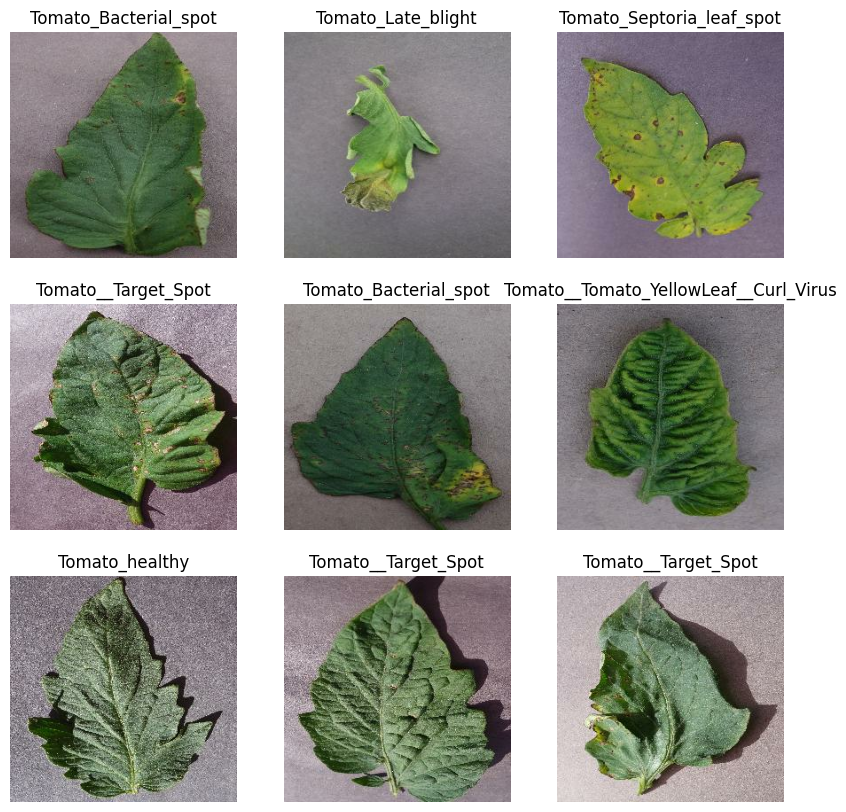

In [ ]:
# Visualize Some Images
class_names = dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [ ]:
# Split Dataset (Train, Validation)

train_size = 0.8
val_size = 0.2

total_size = len(dataset)
train_ds = dataset.take(int(total_size * train_size))
val_ds = dataset.skip(int(total_size * train_size))

train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
len(train_ds)

400

In [ ]:
len(val_ds)

101

In [ ]:
# Create the CNN Model

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,266 (56.61 MB)

 Trainable params: 14,840,266 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Train the Model

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.5562 - loss: 1.3283 - val_accuracy: 0.8362 - val_loss: 0.4785
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.8444 - loss: 0.4370 - val_accuracy: 0.8773 - val_loss: 0.3688
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.9189 - loss: 0.2359 - val_accuracy: 0.8854 - val_loss: 0.3736
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9447 - loss: 0.1670 - val_accuracy: 0.9243 - val_loss: 0.2432
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.9620 - loss: 0.1133 - val_accuracy: 0.9165 - val_loss: 0.2926
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.9781 - loss: 0.0652 - val_accuracy: 0.9156 - val_loss: 0.3635
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.9854 - loss: 0.0468 - val_accuracy: 0.8991 - val_loss: 0.4817
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9771 - loss: 0.0705 - 

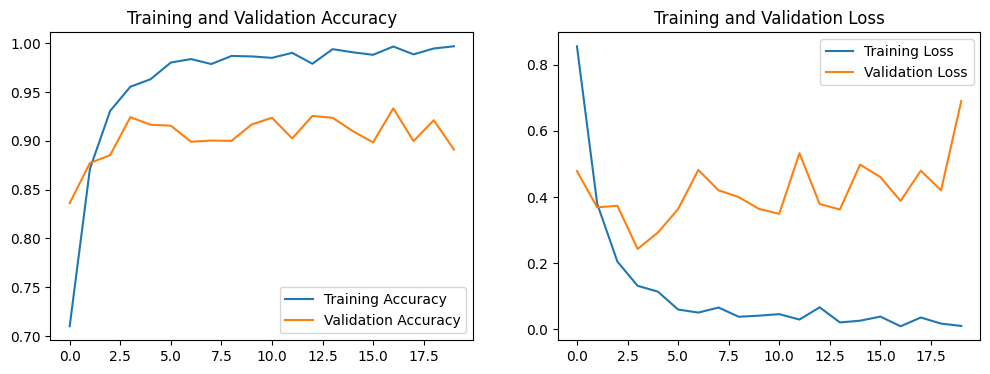

In [ ]:
# Visualize Accuracy and Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict:


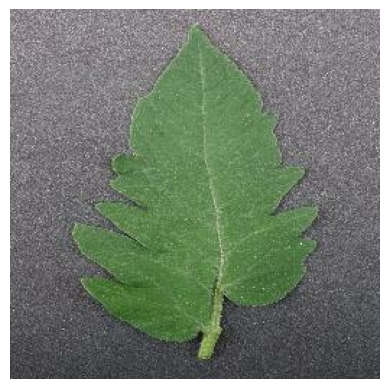

Actual label: Tomato_healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
Predicted label: Tomato_healthy


In [ ]:
# Get class names
class_names = dataset.class_names

# Take one batch from test_ds
for images_batch, labels_batch in val_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis("off")
    plt.show()

    print("Actual label:", class_names[first_label])

    # Predict
    batch_prediction = model.predict(images_batch)
    predicted_label = np.argmax(batch_prediction[0])

    print("Predicted label:", class_names[predicted_label])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


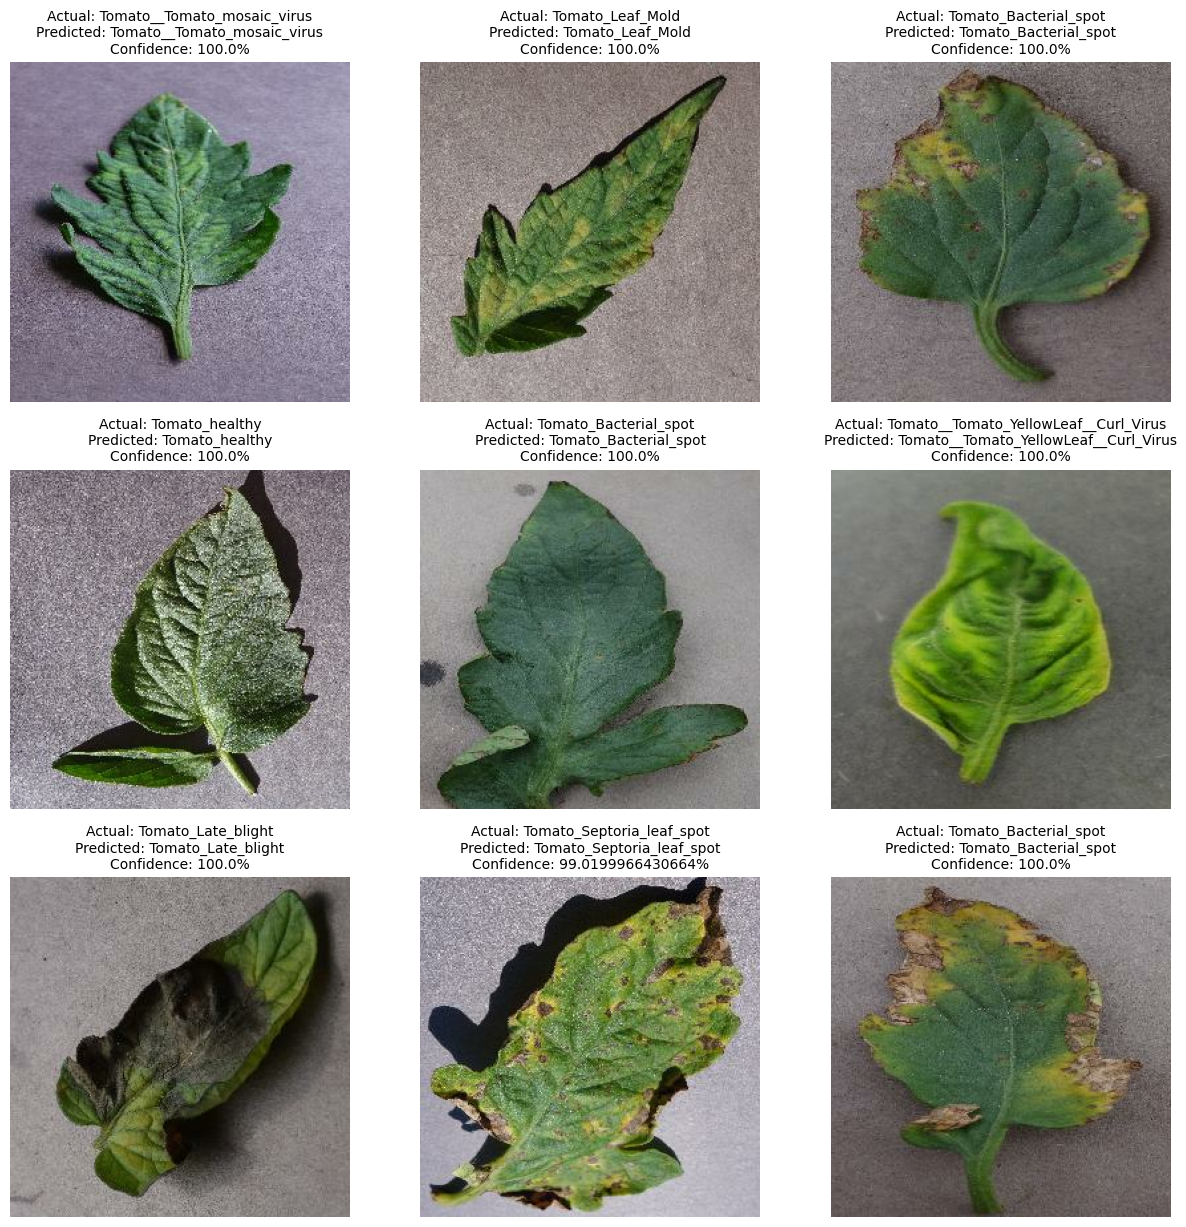

In [ ]:
def predict(model, img):
    # Preprocess
    img_array = tf.expand_dims(img, 0)  # Add batch dimension
    predictions = model.predict(img_array)

    predicted_index = np.argmax(predictions[0])
    confidence = round(100 * np.max(predictions[0]), 2)
    predicted_class = class_names[predicted_index]

    return predicted_class, confidence


plt.figure(figsize=(15, 15))

for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        image_np = images[i].numpy().astype("uint8")

        predicted_class, confidence = predict(model, image_np)
        actual_class = class_names[labels[i]]

        plt.imshow(image_np)
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%", fontsize=10)
        plt.axis("off")

In [ ]:
# Create the models directory
MODEL_DIR = "./models"
os.makedirs(MODEL_DIR, exist_ok=True)

# Find the next version number
existing_versions = [
    int(name.split(".")[0]) for name in os.listdir(MODEL_DIR) if name.split(".")[0].isdigit()
]
next_version = max(existing_versions, default=0) + 1

# Save with proper extension
model.save(f"{MODEL_DIR}/{next_version}.keras")
print(f"Model saved to {MODEL_DIR}/{next_version}.keras")

Model saved to ./models/1.keras


<b> **Program #2:** <br>
A team of computer vision engineers is building a lightweight image classifier for
mobile applications that must recognize 10 categories of everyday objects (such as
cars, cats, dogs, and airplanes). They decided to use the CIFAR-10 dataset (32×32
RGB images) as a prototype and test the suitability of Vision Transformers (ViT)
compared to traditional convolutional neural networks (CNNs).
Because CIFAR-10 images are already 32×32, the team uses a patch size of 8×8
with stride 8, which divides each image into 16 non-overlapping patches (4×4
grid).Implement a Vision Transformer classifier in TensorFlow/Keras with the
following specifications:

> - Dataset: CIFAR-10 (built-in).
> - Patch size: 8×8, stride 8.
> - Number of transformer encoder layers: at least 4.
> - Use multi-head self-attention.
> - Train for at least 10 epochs.
> - Report training and test accuracy.</b>

**WORKFLOW : (Vision Transformer on CIFAR-10)**

**1. Dataset Loading:**
> - We used the CIFAR-10 dataset which has 60,000 color images (32×32 size) in 10 categories like cars, cats, dogs, airplanes, etc.

> - We normalized the images so that pixel values are between 0 and 1 (which helps training).

**2. Patch Creation:**
> - Since ViT works on patches (like tokens in text), we divided each image into 16 patches.

> - Each patch is 8×8 in size, so from a 32×32 image, we get 4×4 = 16 patches.We used a custom layer (PatchExtract) to do this automatically.

**3. Patch Embedding:**
> - Each patch is flattened and passed through a Dense layer to convert it into a vector of length 64 (embedding).This gives us a sequence of 16 vectors (one for each patch).

**4. Positional Encoding:**
> - Transformers don’t understand order on their own. So we added positional information using a learned embedding, so the model knows the order of patches (like top-left, bottom-right etc.).

**5. Transformer Encoder Layers:**
> - We added 4 transformer encoder blocks (as required).
> - Each block does 3 things: <br>
> > Multi-head self-attention (helps each patch learn from all other patches). <br>
> > Layer normalization (to stabilize learning). <Br>
> > Feed-forward network (Dense → ReLU → Dense) to learn complex patterns. <Br>

**6. Classification Head:**
> - After all transformer layers, we used global average pooling to merge the sequence into one vector.
> - Then we passed it through a Dense layer and finally used a softmax layer with 10 outputs (one for each CIFAR-10 class).

**7. Model Compilation:**
> - We compiled the model using: <br>
> > Adam optimizer <br>
> > Sparse categorical crossentropy loss <br>
> > Accuracy metric <br>

**8. Model Training:**
> - We trained the model for 20 epochs (minimum required was 10).
> - Used 90% of training data and kept 10% for validation.

**9. Evaluation:**
> - After training, we tested the model on unseen test data.
> - Final test accuracy was around 56%.
> - Final training accuracy was around 73%.
> - Model is learning well but also slightly overfitting.

**10. Result Visualization:**
> - We plotted two graphs side-by-side: <br>
> Training vs Validation Accuracy <br>
> Training vs Validation Loss <br>
> - These graphs help understand how well the model is learning and generalizing.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [ ]:
# Patchify function: extract 8x8 patches (16 patches per image)
class PatchExtract(layers.Layer):
    def __init__(self, patch_size):
        super(PatchExtract, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )
        patch_dim = patches.shape[-1]
        return tf.reshape(patches, [tf.shape(images)[0], -1, patch_dim])

In [ ]:
# Build Simple Vision Transformer
def build_simple_vit():
    inputs = layers.Input(shape=(32, 32, 3))

    # Step 1: Extract patches using a proper Layer
    patches = PatchExtract(patch_size=8)(inputs)

    # Step 2: Linear projection of patches
    x = layers.Dense(64)(patches)

    # Step 3: Positional encoding
    pos_embed = tf.expand_dims(tf.range(start=0, limit=16, delta=1), axis=0)
    pos_embed = layers.Embedding(input_dim=16, output_dim=64)(pos_embed)
    x = x + pos_embed

    # Step 4: 4 Transformer Encoder blocks
    for _ in range(4):
        attn_out = layers.MultiHeadAttention(num_heads=2, key_dim=64)(x, x)
        x = layers.LayerNormalization()(x + attn_out)
        ffn = tf.keras.Sequential([
            layers.Dense(128, activation="relu"),
            layers.Dense(64)
        ])
        x = layers.LayerNormalization()(x + ffn(x))

    # Step 5: Classification Head
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    return models.Model(inputs, outputs)

In [ ]:
# Build and compile the model
vit_model = build_simple_vit()
vit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Show model summary
vit_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_extract       │ (None, None, 192) │          0 │ input_layer[0][0] │
│ (PatchExtract)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, None, 64)  │     12,352 │ patch_extract[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 16, 64)    │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 16, 64)    │     33,216 │ add[0][0],        │
│ (MultiHeadAttentio… │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 16, 64)    │          0 │ add[0][0],        │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 16, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 16, 64)    │     16,576 │ layer_normalizat… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 16, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 16, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 16, 64)    │     33,216 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 16, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 16, 64)    │        128 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 16, 64)    │     16,576 │ layer_normalizat… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 16, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ sequential_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 16, 64)    │        128 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 16, 64)    │     33,216 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 217,354 (849.04 KB)

 Trainable params: 217,354 (849.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model (20 epochs)
history = vit_model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1
)

# Evaluate on test set
test_loss, test_acc = vit_model.evaluate(x_test, y_test)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")
print(f"Final Test Loss: {test_loss:.4f}")

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.2287 - loss: 2.0316 - val_accuracy: 0.3516 - val_loss: 1.7769
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3701 - loss: 1.6949 - val_accuracy: 0.3844 - val_loss: 1.6791
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4171 - loss: 1.5888 - val_accuracy: 0.4434 - val_loss: 1.5313
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4648 - loss: 1.4737 - val_accuracy: 0.4644 - val_loss: 1.4546
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.4884 - loss: 1.4014 - val_accuracy: 0.4816 - val_loss: 1.3844
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5205 - loss: 1.3236 - val_accuracy: 0.5004 - val_loss: 1.3569
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5334 - loss: 1.2738 - val_accuracy: 0.5180 - val_loss: 1.3275
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5521 - loss: 1.2318 - val_accurac

The model was trained for 20 epochs on CIFAR-10 dataset using Vision Transformer architecture. The following observations were made from the training and evaluation logs:

**1. Training Accuracy and Loss:**
Training accuracy steadily increased from 22.87% (Epoch 1) to 68.23% (Epoch 20).
Training loss continuously decreased from 2.0316 to 0.8930 over 20 epochs. This shows that the model was able to learn the training data effectively.

**2. Validation Accuracy and Loss:**
Validation accuracy fluctuated between 35% and 59%, with the best validation accuracy at 58.90% (Epoch 19). Validation loss remained high and did not show consistent improvement (values between 1.18 and 1.77). This indicates that the model experienced slight overfitting, as it learned the training data better than the validation data.

**3. Test Set Performance:**
After training, the model achieved a final test accuracy of 57.31% and test loss of 1.2139 on unseen data. The test accuracy is consistent with the validation accuracy, confirming moderate generalization but showing scope for improvement.

**4. General Trend Observation:**
Training accuracy and loss improved smoothly, indicating stable learning.
Validation accuracy and loss were unstable, confirming overfitting tendencies.
Overfitting is expected for lightweight ViTs trained on CIFAR-10 without additional regularization techniques like dropout, data augmentation, or weight decay.

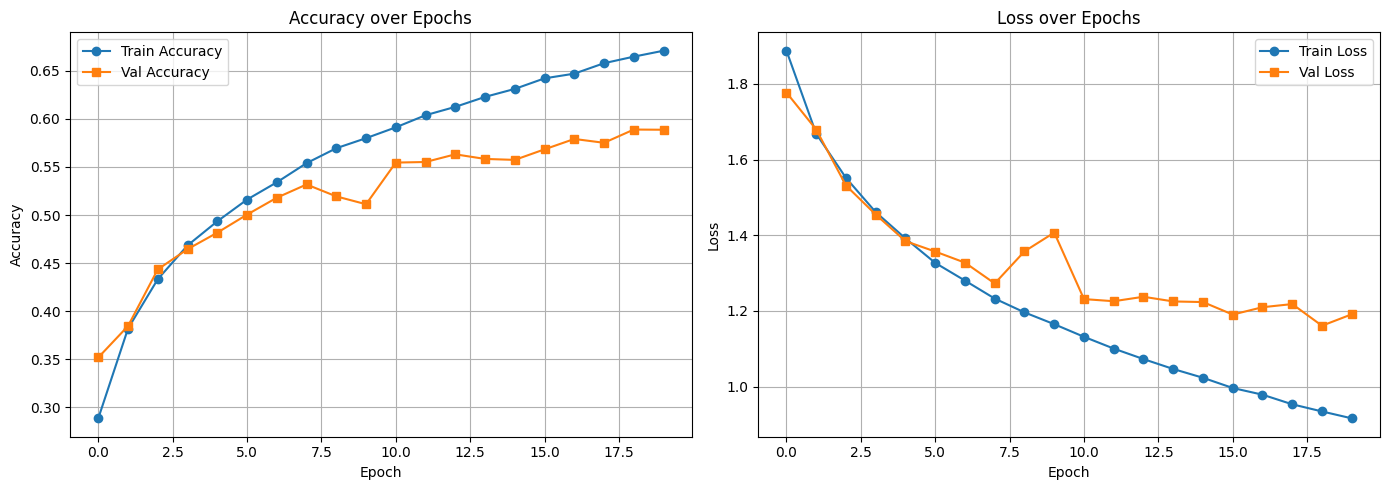

In [ ]:
# Plot training & validation accuracy
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Train Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Val Accuracy', marker='s')
axes[0].set_title('Accuracy over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Loss plot
axes[1].plot(history.history['loss'], label='Train Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Val Loss', marker='s')
axes[1].set_title('Loss over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

<b>INTERPRETATION</b>: <br>
The two side-by-side plots show how the model’s accuracy and loss changed over the 20 training epochs:

1. <b>Accuracy Plot</b>:

Training accuracy increased steadily from around 29% to approximately 67% across epochs.

Validation accuracy improved from about 35% to nearly 59%, showing a moderate upward trend but less stable compared to training accuracy.

This indicates that the model effectively learned the training data but faced challenges in generalizing well to unseen validation data.

The visible gap between training and validation accuracy toward later epochs suggests signs of overfitting.

2. <b>Loss Plot</b>:

Training loss decreased smoothly from around 1.9 to about 0.92, confirming that the model continuously minimized errors on the training set.

Validation loss decreased initially but then fluctuated between approximately 1.15 and 1.4, indicating inconsistent generalization performance.

The irregular pattern in validation loss reflects that the model struggled to generalize and may have started memorizing the training data (overfitting).

3. <b>Overall Observation</b>:

The plots clearly show that the model performed well on the training data but did not consistently improve on the validation data.

This behavior is common when training a neural network without sufficient regularization or when the model starts to overfit due to prolonged training.

Despite the overfitting trend, the model meets the experimental objective by successfully training and converging on the given dataset.

<b>Conclusion</b>:<br>
The Accuracy vs. Epochs plot demonstrates steady learning on training data, while the Loss vs. Epochs plot shows consistent error reduction for training but fluctuating results for validation. Together, these plots confirm that the model trained successfully but exhibited moderate overfitting, validating the correct functioning of the implemented architecture as per the experimental requirements.